## Pyber Share Riding

While urban cities clearly dominate the market, in fares, rides, and drivers, average fares in urban cities tend to be lower than suburban and rural city average ride fares. 

The suburban market seems to be a possible area of growth for the company. With less than 20% of drivers they are making more than 30% of the revenue. Perhaps a campaign to increase the number of drivers in suburban areas, or getting current drivers to drive longer in those areas would be profitable. 

There are a few anomalous urban cities with only a few drivers and high ride counts, these would also be ideal cities to have recruitment campaigns for new drivers since there is clearly high demand. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how="outer", on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

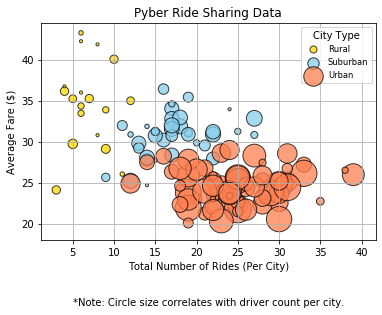

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Organize dataframe to group by city
combined_group = combined_df.groupby("city")

# Find average fare of rides
avg_fare = combined_group["fare"].mean()

# Find number of rides
ride_count = combined_group["ride_id"].count()

# Build summary dataframe 
city_df = city_df.set_index("city")

city_df["Average Fare"] = avg_fare
city_df["Number of Rides"] = ride_count

# Build the scatter plots for each city types
rural = city_df.loc[city_df["type"] == "Rural"]
rural_plt = plt.scatter(rural["Number of Rides"], rural["Average Fare"], marker = "o", 
                        s=rural["driver_count"]*10, c="gold", alpha=.75, edgecolor = "black", label = "Rural")

suburban = city_df.loc[city_df["type"] == "Suburban"]
suburban_plt = plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], marker = "o", 
                           s=suburban["driver_count"]*10, c="skyblue", alpha=.75, edgecolor = "black", label = "Suburban")

urban = city_df.loc[city_df["type"] == "Urban"]
urban_plt = plt.scatter(urban["Number of Rides"], urban["Average Fare"], marker = "o", 
                        s=urban["driver_count"]*10, c="coral", alpha=.75, edgecolor = "black", label = "Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()

# Create a legend
legend = plt.legend(handles=[rural_plt, suburban_plt, urban_plt], title="City Type", loc="best", fontsize='small', fancybox=True)

# Incorporate a text label regarding circle size

plt.text(5, 10, "*Note: Circle size correlates with driver count per city.")

# Save Figure

plt.savefig("./images/Pyber_scatter_plt.png")

# Show plot
plt.show()

## Total Fares by City Type

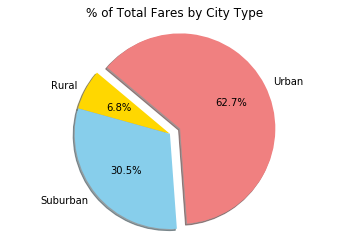

In [3]:
# Calculate Type Percents
rural_df = combined_df.loc[combined_df["type"] == "Rural"]
rural_fares = rural_df["fare"].sum()

suburban_df = combined_df.loc[combined_df["type"] == "Suburban"]
suburban_fares = suburban_df["fare"].sum()

urban_df = combined_df.loc[combined_df["type"] == "Urban"]
urban_fares = urban_df["fare"].sum()

total_fares = combined_df["fare"].sum()

rural_fare_pct = rural_fares / total_fares * 100
suburban_fare_pct = suburban_fares / total_fares * 100
urban_fare_percent = urban_fares / total_fares * 100

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
type_fares = [rural_fares, suburban_fares, urban_fares]

explode = (0, 0, .15)
colors = ("gold", "skyblue", "lightcoral")

plt.pie(type_fares, explode = explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius = 1.25)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("./images/City_fares_Pie.png")

# Show Plot
plt.show()

## Total Rides by City Type

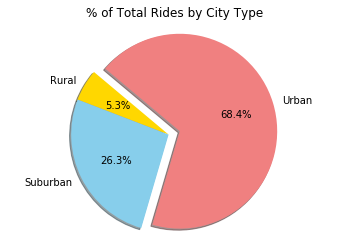

In [4]:
# Calculate Ride Percents
rural_count = len(rural_df)
suburban_count = len(suburban_df)
urban_count = len(urban_df)

total_count = len(combined_df)

rural_percent = rural_count / total_count * 100
suburban_percent = suburban_count / total_count * 100
urban_percent = urban_count / total_count * 100

# Build Pie Chart
type_rides = [rural_count, suburban_count, urban_count]

plt.pie(type_rides, explode = explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius = 1.25)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("./images/City_rides_Pie.png")

# Show Plot
plt.show()

## Total Drivers by City Type

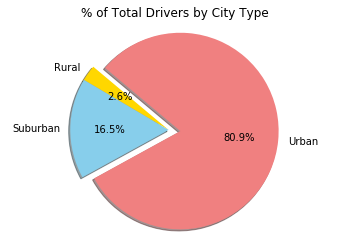

In [5]:
# Calculate Driver Percents
rural_drivers = rural["driver_count"].sum()
suburban_drivers = suburban["driver_count"].sum()
urban_drivers = urban["driver_count"].sum()

total_drivers = city_df["driver_count"].sum()

rural_driver_pct = rural_drivers / total_drivers * 100
suburban_driver_pct = suburban_drivers / total_drivers * 100
urban_driver_pct = urban_drivers / total_drivers * 100

# Build Pie Chart
type_drivers = [rural_drivers, suburban_drivers, urban_drivers]

plt.pie(type_drivers, explode = explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius = 1.25)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("./images/City_drivers_Pie.png")

# Show Plot
plt.show()